# Zero curves: Descriptions
Notebook summarizes zero curves related functionalities.

- `ZeroCurve`,
- `LogLinearZeroCurve`,
- `CubicZeroCurve`,
- `NaturalCubicZeroCurve`,
- `LogCubicZeroCurve`,
- `MonotonicCubicZeroCurve`.

For each of these object it is expected that we pass in zero rates. The first zero rate is understood to be $t=0$ rate. The object does NOT consume _evaluation date_.


In [1]:
import QuantLib as ql
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%config InlineBackend.figure_format='retina'

# conversion of python date to QuantLib date
def dt_to_ql_Date(dt): return ql.Date(dt.day, dt.month, dt.year)

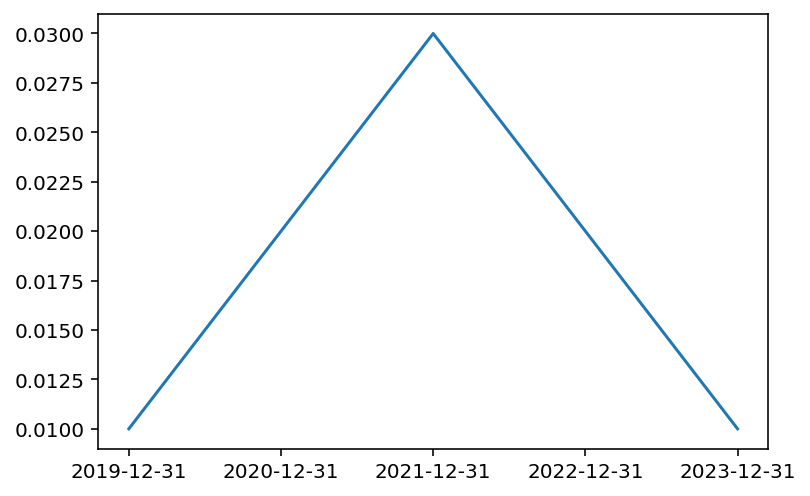

In [2]:
dates    = ['2019-12-31', '2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31']
dates_ql = [dt_to_ql_Date(pd.to_datetime(date, dayfirst=False, yearfirst=True)) for date in dates]
zeros    = [0.01, 0.02, 0.03, 0.02, 0.01]
days     = [ql.Date(date) for date in range(dates_ql[0].serialNumber(), dates_ql[-1].serialNumber())] # daily dates spanning first date till last date

plt.plot(dates, zeros);

# `ZeroCurve`
- input: zero rates
- business idea: rates are linearly interpolated

curve nodes: ((Date(31,12,2019), 0.01), (Date(31,12,2020), 0.02), (Date(31,12,2021), 0.03), (Date(31,12,2022), 0.02), (Date(31,12,2023), 0.01))


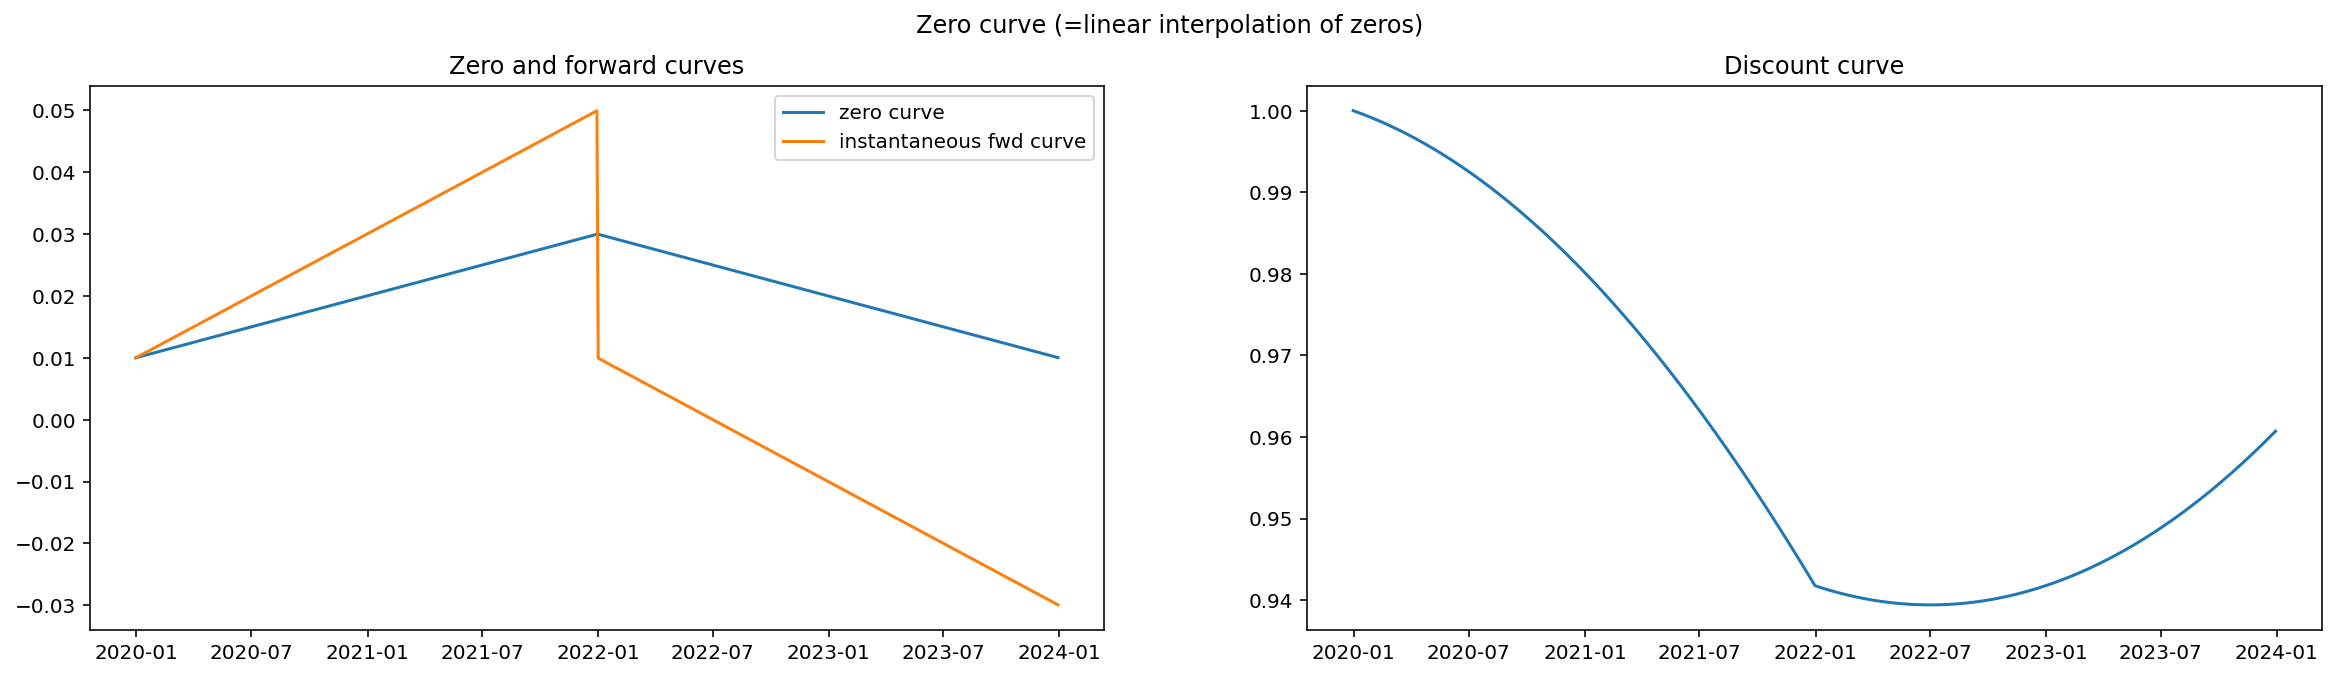

In [3]:
curve = ql.ZeroCurve(dates_ql, zeros, ql.ActualActual(), ql.NullCalendar()) #inputs are assumed to be under continuous compounding
print('curve nodes:', curve.nodes()) # show input nodes. We could have passed in zeros that assume e.g. yearly compounding and then these would display under 'nodes' under continuous compounding

zero_curve_rates = [curve.zeroRate(date, ql.ActualActual(), ql.Continuous).rate() for date in days]
fwd_curve_rates  = [curve.forwardRate(date, date, ql.ActualActual(), ql.Continuous).rate() for date in days]
discount_curve   = [curve.discount(date) for date in days]


fig, ax = plt.subplots(ncols = 2, figsize = (20, 5))
fig.suptitle('Zero curve (=linear interpolation of zeros)');
ax[0].plot([date.to_date() for date in days], zero_curve_rates);
ax[0].plot([date.to_date() for date in days], fwd_curve_rates);
ax[0].legend(['zero curve', 'instantaneous fwd curve']);
ax[0].set_title('Zero and forward curves');
ax[1].plot([date.to_date() for date in days], discount_curve)
ax[1].set_title('Discount curve');

# `LogLinearZeroCurve`

- input: zero rates
- business idea: logarithm of (zero continuous) rate is linearly interpolated:
\begin{equation}
\ln r(t) = \ln r({t_1}) + \frac{{\ln r({t_2}) - \ln r({t_1})}}{{{t_2} - {t_1}}}(t - {t_1}),{t_1} \leqslant t \leqslant {t_2}
\end{equation}

**Note**:
When rates are negative this method of rates interpolation obviously doesn't work because the ln can't take negative number. 

curve nodes: ((Date(31,12,2019), 0.01), (Date(31,12,2020), 0.02), (Date(31,12,2021), 0.03), (Date(31,12,2022), 0.02), (Date(31,12,2023), 0.01))


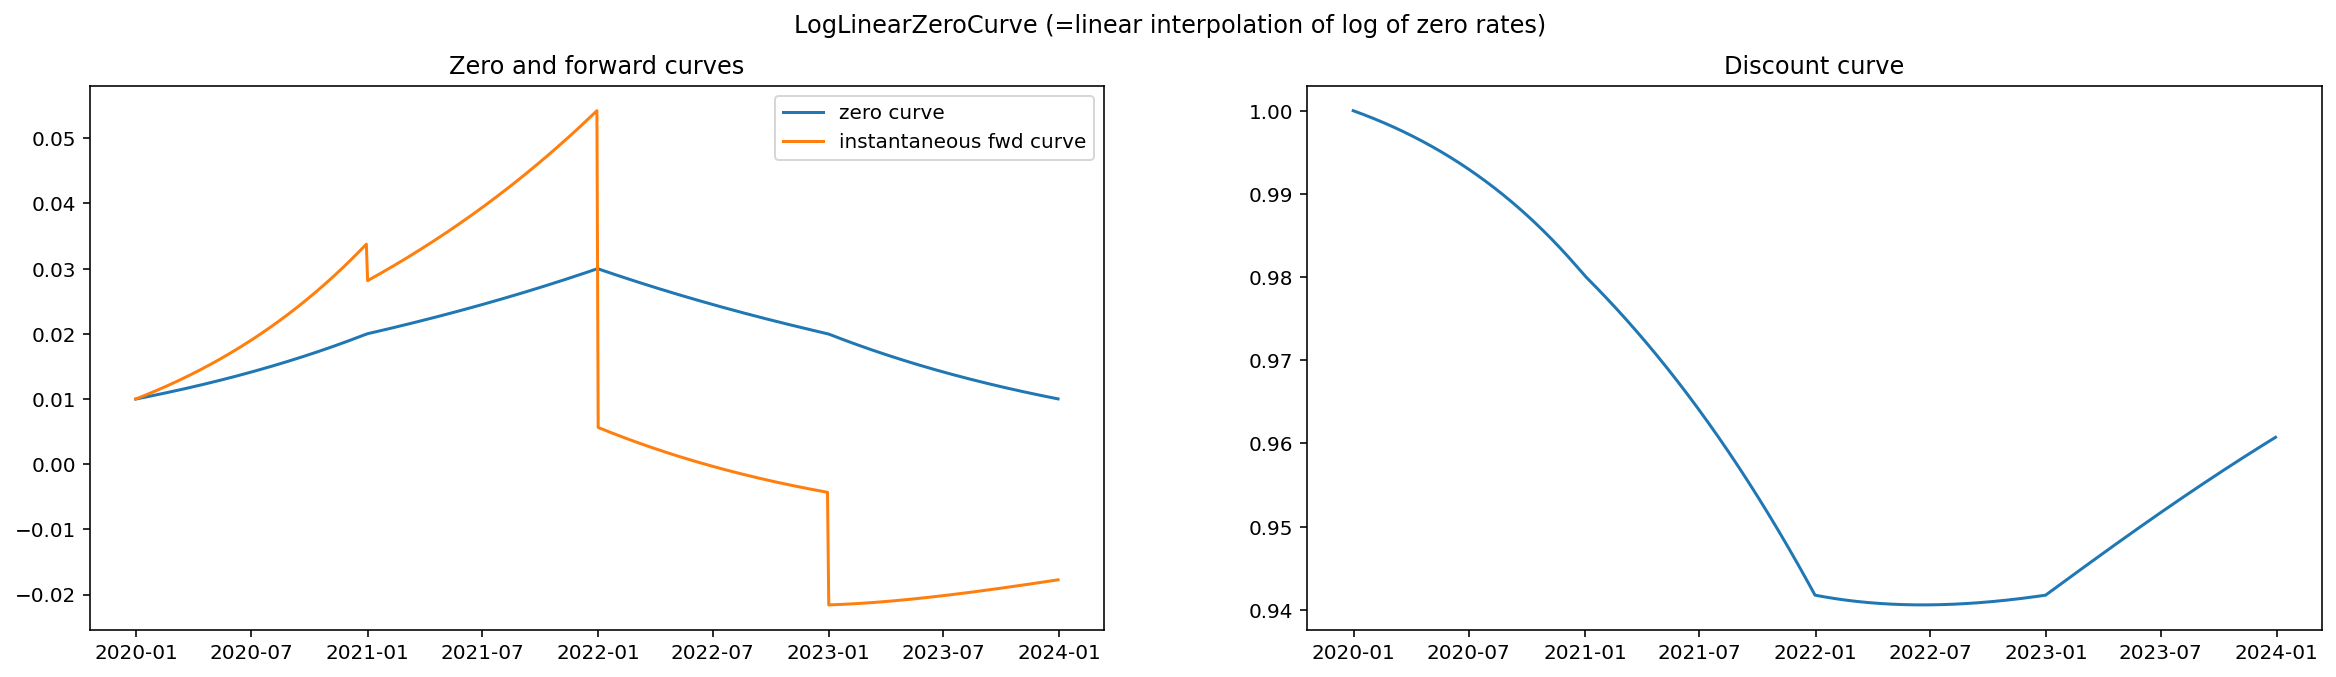

In [4]:
curve = ql.LogLinearZeroCurve(dates_ql, zeros, ql.ActualActual(), ql.NullCalendar()) #inputs are assumed to be under continuous compounding
print('curve nodes:', curve.nodes()) # show input nodes. We could have passed in zeros that assume e.g. yearly compounding and then these would display under 'nodes' under continuous compounding

zero_curve_rates = [curve.zeroRate(date, ql.ActualActual(), ql.Continuous).rate() for date in days]
fwd_curve_rates  = [curve.forwardRate(date, date, ql.ActualActual(), ql.Continuous).rate() for date in days]
discount_curve   = [curve.discount(date) for date in days]


fig, ax = plt.subplots(ncols = 2, figsize = (20, 5))
fig.suptitle('LogLinearZeroCurve (=linear interpolation of log of zero rates)');
ax[0].plot([date.to_date() for date in days], zero_curve_rates);
ax[0].plot([date.to_date() for date in days], fwd_curve_rates);
ax[0].legend(['zero curve', 'instantaneous fwd curve']);
ax[0].set_title('Zero and forward curves');
ax[1].plot([date.to_date() for date in days], discount_curve)
ax[1].set_title('Discount curve');

In [5]:
# test of interpolation logic at t=1.5
print(np.exp(np.log(curve.zeroRate(1, ql.Continuous).rate())*0.5 + np.log(curve.zeroRate(2, ql.Continuous).rate())*0.5))
curve.zeroRate(1.5, ql.Continuous).rate()

0.02449483388108441


0.02449486025479096

# `CubicZeroCurve`
- input: zero rates
- business idea: *inner part* of the zero curve uses cubic interpolation

**Note**: edge parts of the curve use linear interpolation

curve nodes: ((Date(31,12,2019), 0.01), (Date(31,12,2020), 0.02), (Date(31,12,2021), 0.03), (Date(31,12,2022), 0.02), (Date(31,12,2023), 0.01))


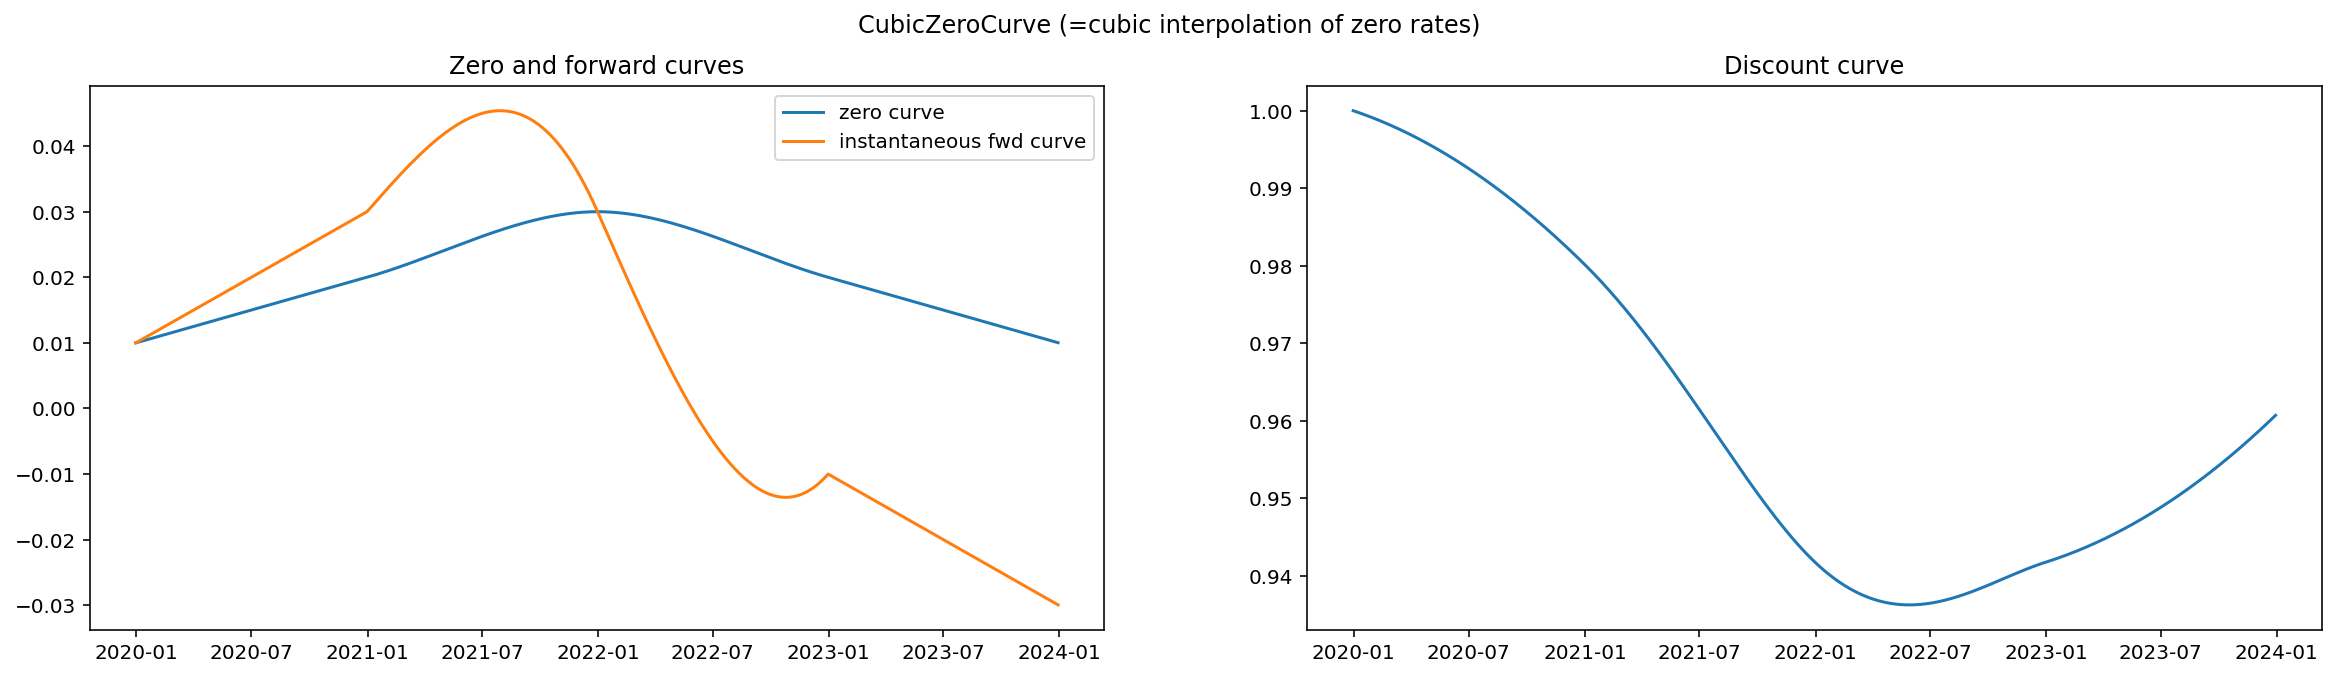

In [6]:
curve = ql.CubicZeroCurve(dates_ql, zeros, ql.ActualActual(), ql.NullCalendar()) #inputs are assumed to be under continuous compounding
print('curve nodes:', curve.nodes()) # show input nodes. We could have passed in zeros that assume e.g. yearly compounding and then these would display under 'nodes' under continuous compounding

zero_curve_rates = [curve.zeroRate(date, ql.ActualActual(), ql.Continuous).rate() for date in days]
fwd_curve_rates  = [curve.forwardRate(date, date, ql.ActualActual(), ql.Continuous).rate() for date in days]
discount_curve   = [curve.discount(date) for date in days]


fig, ax = plt.subplots(ncols = 2, figsize = (20, 5))
fig.suptitle('CubicZeroCurve (=cubic interpolation of zero rates)');
ax[0].plot([date.to_date() for date in days], zero_curve_rates);
ax[0].plot([date.to_date() for date in days], fwd_curve_rates);
ax[0].legend(['zero curve', 'instantaneous fwd curve']);
ax[0].set_title('Zero and forward curves');
ax[1].plot([date.to_date() for date in days], discount_curve)
ax[1].set_title('Discount curve');

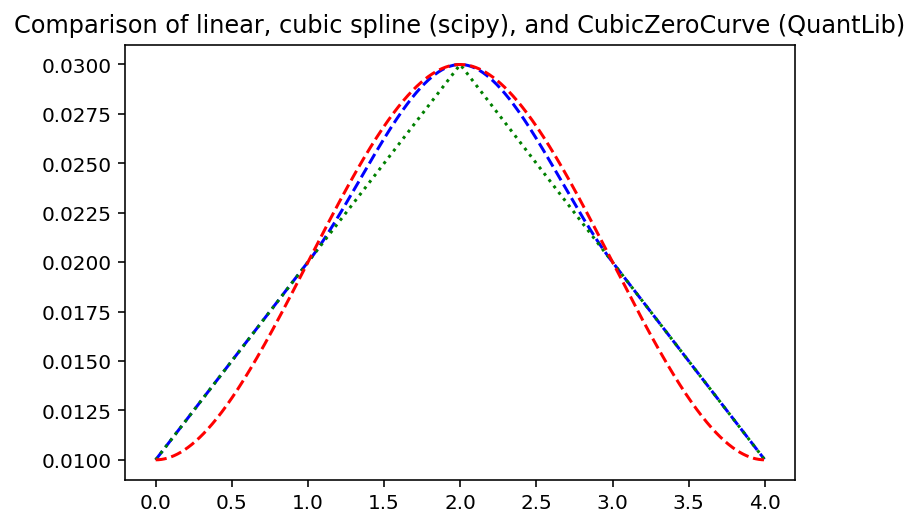

In [7]:
# comparison of Linear, scipy cubic spline and CubicZeroCurve (QuantLib)
from scipy.interpolate import interp1d
interpolator_linear = interp1d([0, 1, 2, 3, 4], zeros, kind='linear')
interpolator_cubic  = interp1d([0, 1, 2, 3, 4], zeros, kind='cubic')
interp_times = [(date.serialNumber()-days[0].serialNumber())/365.25 for date in days]
ql_rates     = [curve.zeroRate(time, ql.Continuous).rate() for time in interp_times]

plt.title('Comparison of linear, cubic spline (scipy), and CubicZeroCurve (QuantLib)');
plt.plot(interp_times, ql_rates, 'b--');
plt.plot(interp_times, interpolator_linear(interp_times), 'g:');
plt.plot(interp_times, interpolator_cubic(interp_times), 'r--');


# `NaturalCubicZeroCurve` (cubic spline)
- input: zero rates
- business idea: zero curve uses cubic splines (=both zero and fwd curves are smooth)

curve nodes: ((Date(31,12,2019), 0.01), (Date(31,12,2020), 0.02), (Date(31,12,2021), 0.03), (Date(31,12,2022), 0.02), (Date(31,12,2023), 0.01))


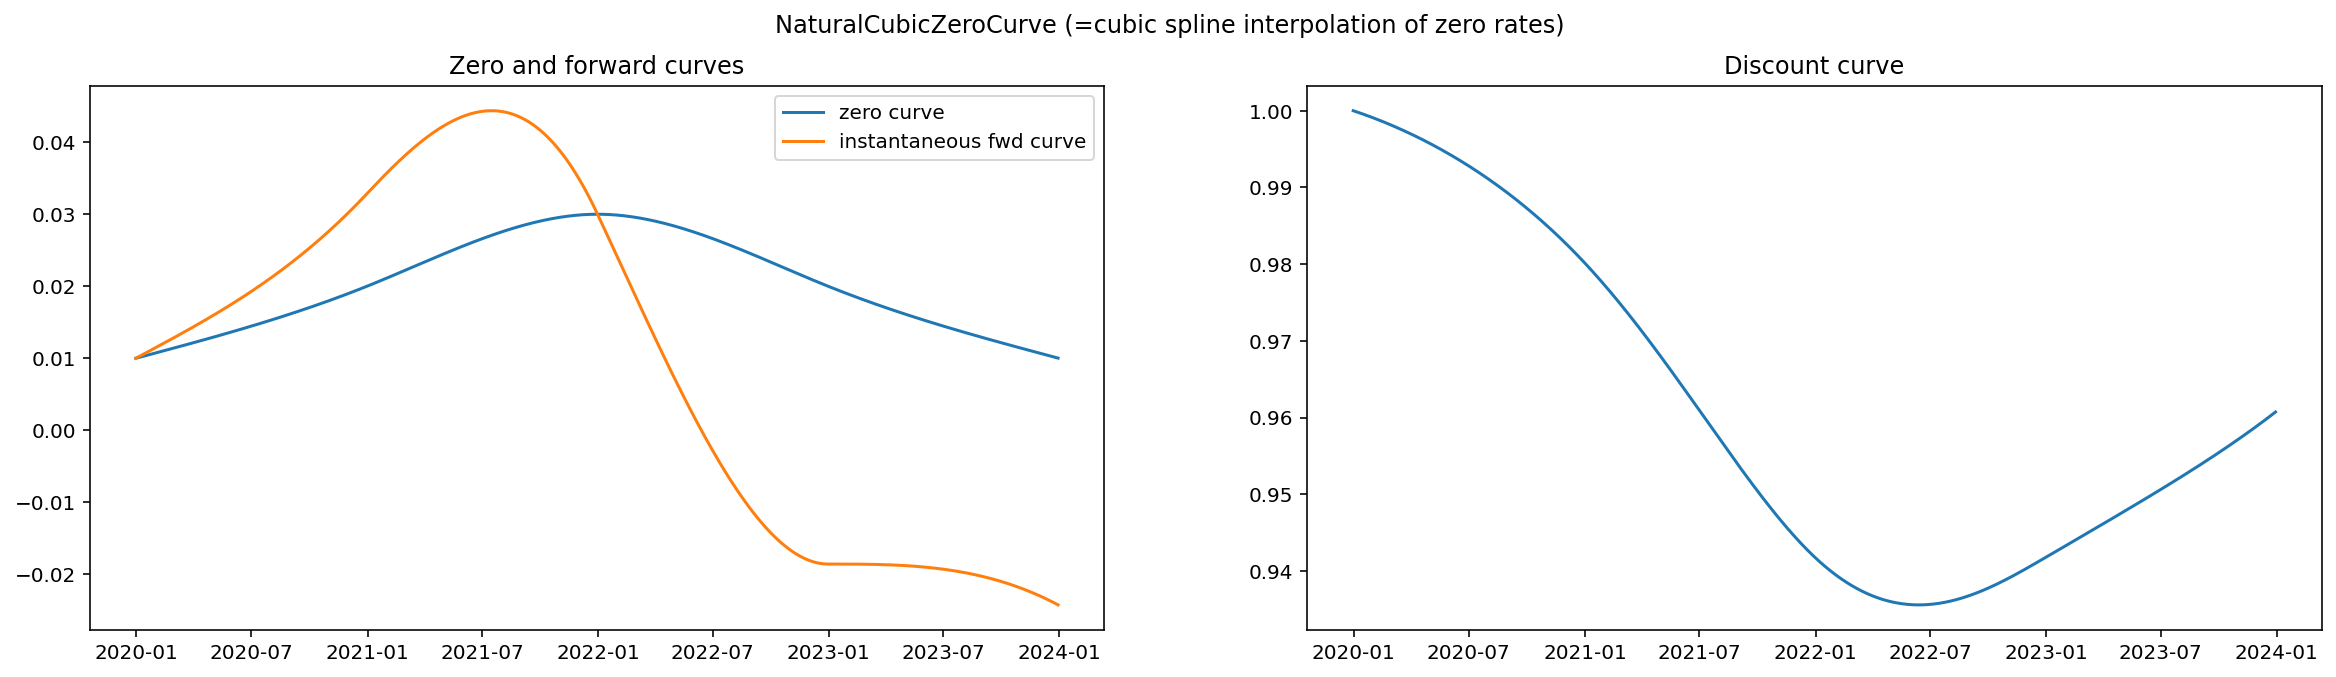

In [8]:
curve = ql.NaturalCubicZeroCurve(dates_ql, zeros, ql.ActualActual(), ql.NullCalendar()) #inputs are assumed to be under continuous compounding
print('curve nodes:', curve.nodes()) # show input nodes. We could have passed in zeros that assume e.g. yearly compounding and then these would display under 'nodes' under continuous compounding

zero_curve_rates = [curve.zeroRate(date, ql.ActualActual(), ql.Continuous).rate() for date in days]
fwd_curve_rates  = [curve.forwardRate(date, date, ql.ActualActual(), ql.Continuous).rate() for date in days]
discount_curve   = [curve.discount(date) for date in days]


fig, ax = plt.subplots(ncols = 2, figsize = (20, 5))
fig.suptitle('NaturalCubicZeroCurve (=cubic spline interpolation of zero rates)');
ax[0].plot([date.to_date() for date in days], zero_curve_rates);
ax[0].plot([date.to_date() for date in days], fwd_curve_rates);
ax[0].legend(['zero curve', 'instantaneous fwd curve']);
ax[0].set_title('Zero and forward curves');
ax[1].plot([date.to_date() for date in days], discount_curve)
ax[1].set_title('Discount curve');

# `LogCubicZeroCurve`
- input: zero rates
- business idea: log of of rates uses cubic interpolation

curve nodes: ((Date(31,12,2019), 0.01), (Date(31,12,2020), 0.02), (Date(31,12,2021), 0.03), (Date(31,12,2022), 0.02), (Date(31,12,2023), 0.01))


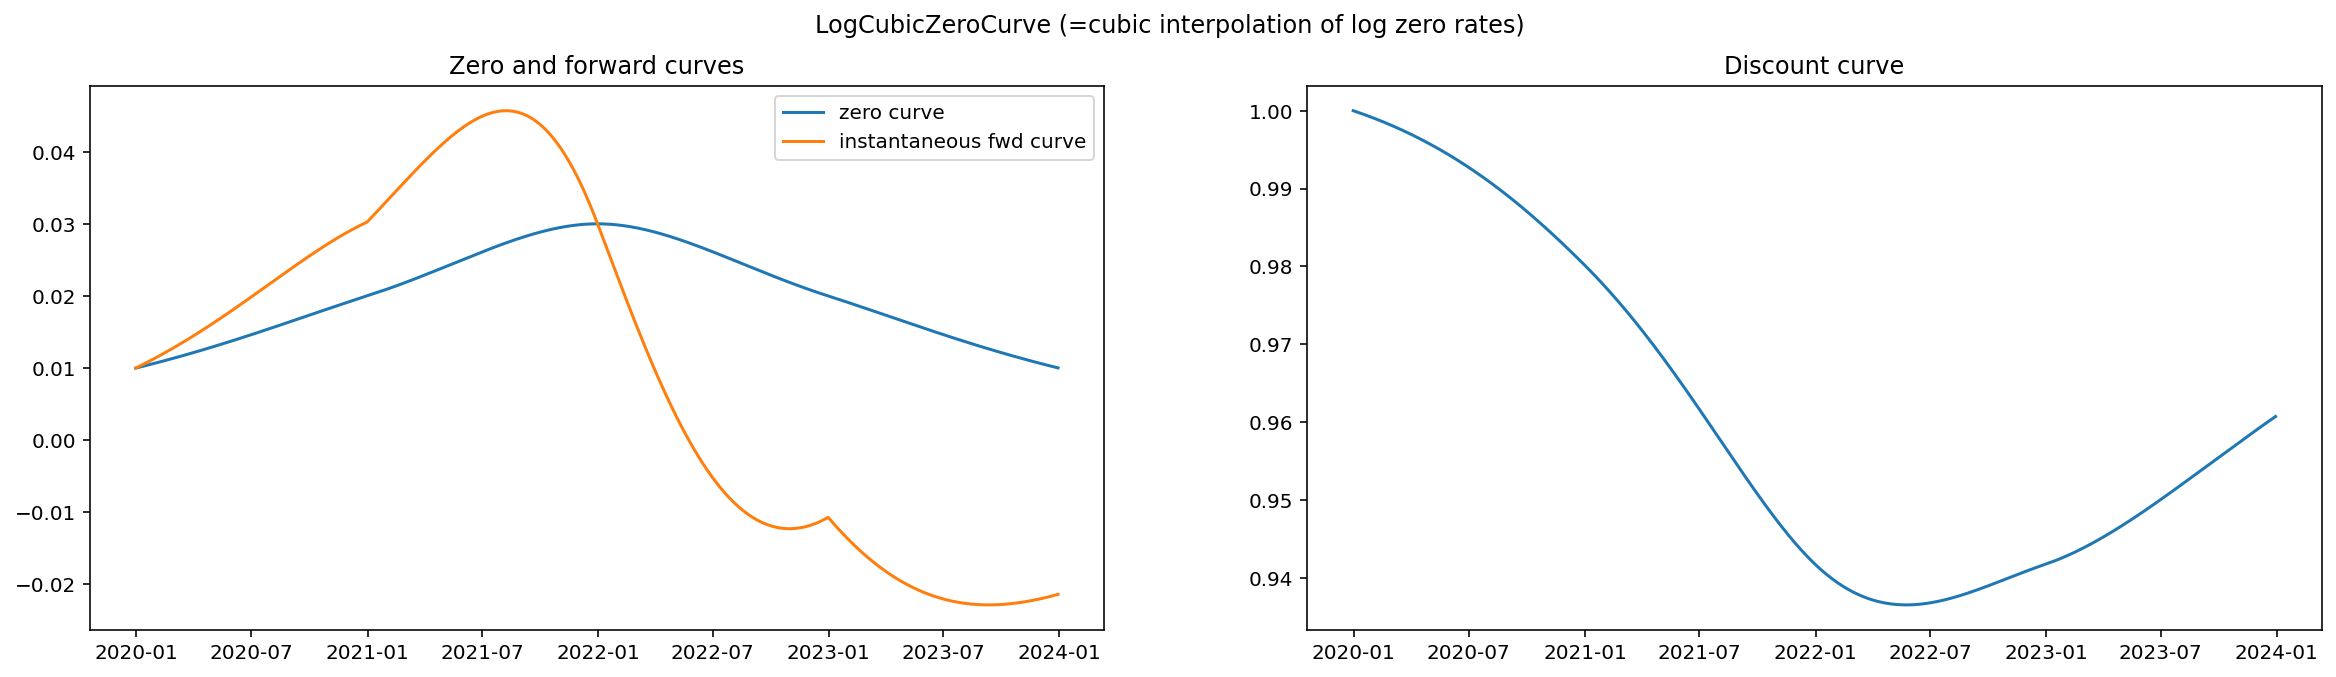

In [9]:
curve = ql.LogCubicZeroCurve(dates_ql, zeros, ql.ActualActual(), ql.NullCalendar()) #inputs are assumed to be under continuous compounding
print('curve nodes:', curve.nodes()) # show input nodes. We could have passed in zeros that assume e.g. yearly compounding and then these would display under 'nodes' under continuous compounding

zero_curve_rates = [curve.zeroRate(date, ql.ActualActual(), ql.Continuous).rate() for date in days]
fwd_curve_rates  = [curve.forwardRate(date, date, ql.ActualActual(), ql.Continuous).rate() for date in days]
discount_curve   = [curve.discount(date) for date in days]


fig, ax = plt.subplots(ncols = 2, figsize = (20, 5))
fig.suptitle('LogCubicZeroCurve (=cubic interpolation of log zero rates)');
ax[0].plot([date.to_date() for date in days], zero_curve_rates);
ax[0].plot([date.to_date() for date in days], fwd_curve_rates);
ax[0].legend(['zero curve', 'instantaneous fwd curve']);
ax[0].set_title('Zero and forward curves');
ax[1].plot([date.to_date() for date in days], discount_curve)
ax[1].set_title('Discount curve');

# `MonotonicCubicZeroCurve`
- input: zero rates
- business idea: as cubic but monotone in the sense that interpolated rate $r(t),t_1<t<t_2$ is always between $r(t_1)$ and $r(t_2)$. 

curve nodes: ((Date(31,12,2019), 0.01), (Date(31,12,2020), 0.02), (Date(31,12,2021), 0.03), (Date(31,12,2022), 0.02), (Date(31,12,2023), 0.01))


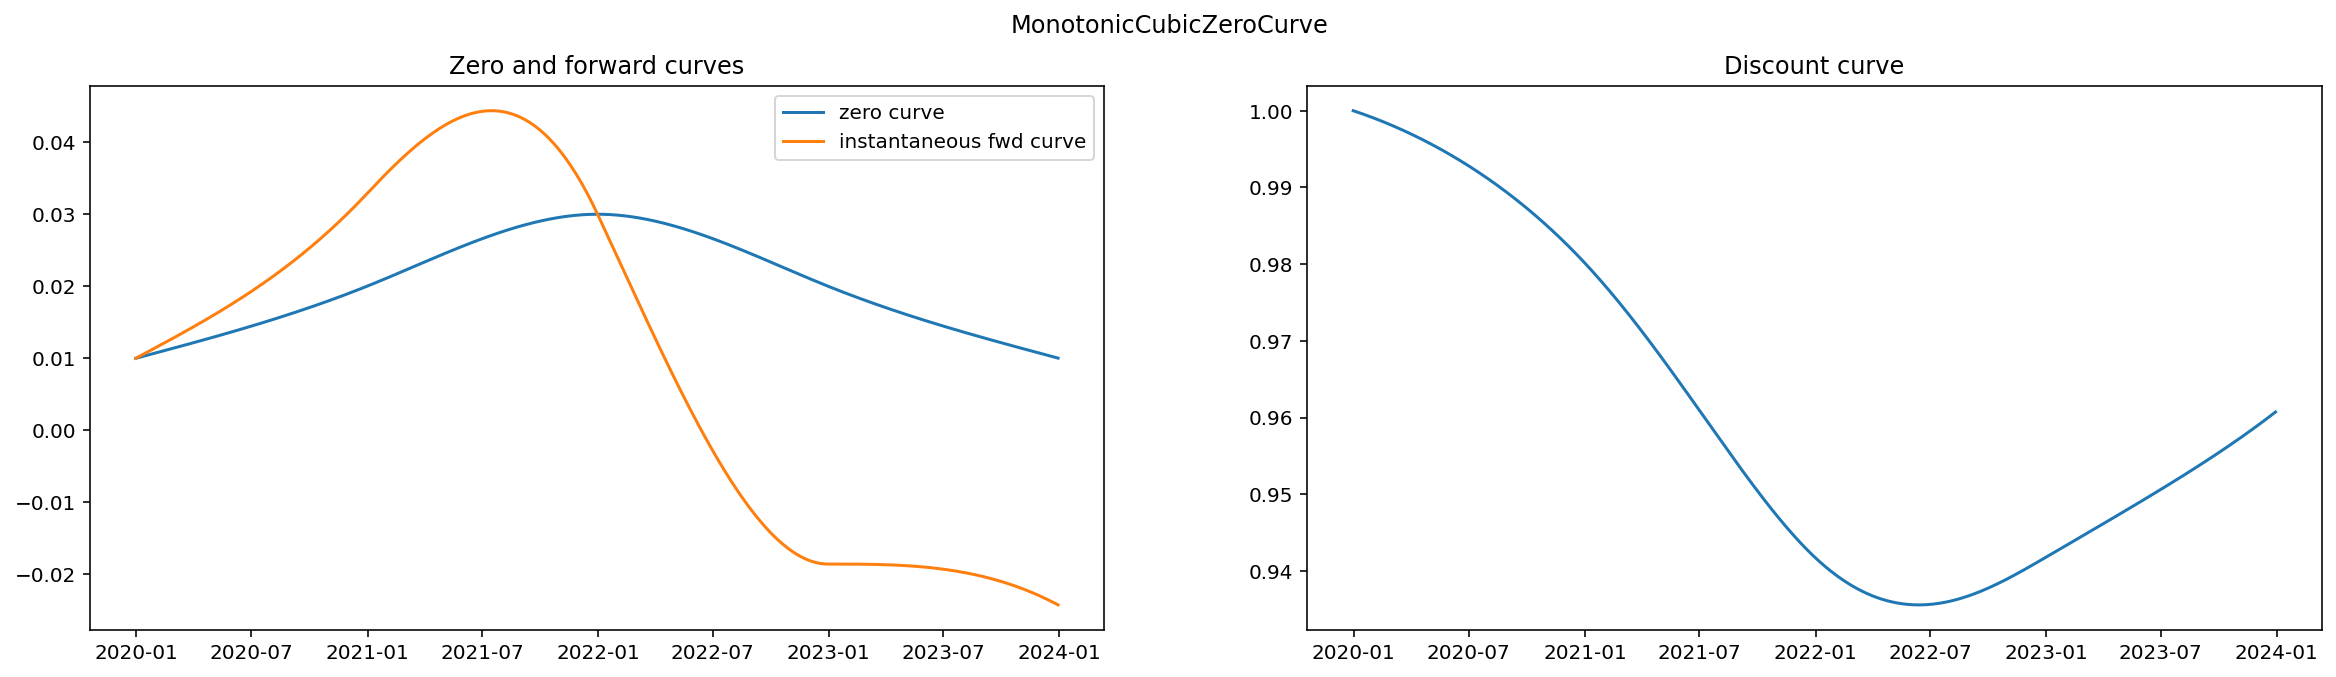

In [10]:
curve = ql.MonotonicCubicZeroCurve(dates_ql, zeros, ql.ActualActual(), ql.NullCalendar()) #inputs are assumed to be under continuous compounding
print('curve nodes:', curve.nodes()) # show input nodes. We could have passed in zeros that assume e.g. yearly compounding and then these would display under 'nodes' under continuous compounding

zero_curve_rates = [curve.zeroRate(date, ql.ActualActual(), ql.Continuous).rate() for date in days]
fwd_curve_rates  = [curve.forwardRate(date, date, ql.ActualActual(), ql.Continuous).rate() for date in days]
discount_curve   = [curve.discount(date) for date in days]


fig, ax = plt.subplots(ncols = 2, figsize = (20, 5))
fig.suptitle('MonotonicCubicZeroCurve');
ax[0].plot([date.to_date() for date in days], zero_curve_rates);
ax[0].plot([date.to_date() for date in days], fwd_curve_rates);
ax[0].legend(['zero curve', 'instantaneous fwd curve']);
ax[0].set_title('Zero and forward curves');
ax[1].plot([date.to_date() for date in days], discount_curve)
ax[1].set_title('Discount curve');